$f(x_1, x_2) = \left( x_1 + x_2^2 \right)^2$

$x = ( 1, 0 )$, $p = ( -1, 1 )$ - is a descent direction

$p \cdot \nabla f < 0$

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$

$$
\nabla f = \left( 2x_1 + 2x_2^2, 4x_1x_2 + 4x_2^3 \right) = \left( 2, 0 \right)
$$

$$p \cdot \nabla f = -2 < 0$$

$$f(x + \alpha p) = f(x_1 - \alpha, x_2 + \alpha) = \left(x_1 - \alpha + (x_2 + \alpha)^2\right)^2$$

$$f(x+\alpha p) = (x_1 - \alpha + x_2^2 + 2\alpha x_2 + \alpha^2)^2$$

$$f(x + \alpha p) = (1 - \alpha + \alpha^2)^2$$

$$\min\limits_{\alpha > 0} (1 - a + \alpha^2)$$

$$-1 + 2\alpha = 0 \rightarrow \alpha = 0.5$$

# Exercise 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from scipy import optimize

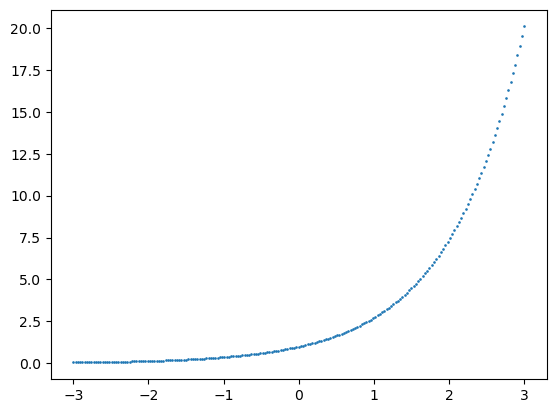

In [35]:
k = 201
X = np.linspace(-3, 3, k)
Y = np.exp(X)
plt.scatter(X, Y, s = 0.8)

In [37]:
def f(x, a):
    return (a[0] + a[1] * x + a[2] * x**2) / (1 + a[3] * x + a[4] * x**2)

In [39]:
def loss(a):
    P = 50
    return jnp.sum((f(X, a) - Y)**P) ** (1/P)

In [41]:
a0 = np.random.normal(size=5)
res = optimize.minimize(
    loss, 
    a0,   #Initial value
    jac  = jax.grad(loss),
    method = 'BFGS'
)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 10.530271793064161
        x: [ 9.592e+00 -1.742e+01 -1.318e+01 -1.793e+00 -1.361e+00]
      nit: 79
      jac: [ 3.008e-07 -6.719e-07  1.085e-06 -4.395e-06  8.736e-06]
 hess_inv: [[ 2.581e-01 -3.851e-01 ... -8.829e-03 -5.247e-03]
            [-3.851e-01  7.601e-01 ...  2.041e-02  1.190e-02]
            ...
            [-8.829e-03  2.041e-02 ...  2.287e-03  1.319e-03]
            [-5.247e-03  1.190e-02 ...  1.319e-03  8.005e-04]]
     nfev: 138
     njev: 138

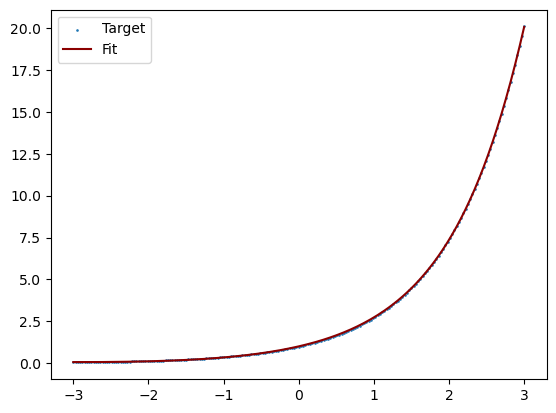

In [16]:
plt.scatter(X, Y, s=0.8, label='Target')
plt.plot(X, f(X, res.x), color='darkred', label="Fit")
plt.legend()

# Exercise 4

# Exercise 3

In [25]:
import numpy as np
from scipy.optimize import minimize

def angle_between_points(r1, r2, r3):
    numerator = np.dot(r3 - r1, r2 - r1)
    denominator = np.linalg.norm(r3 - r1) * np.linalg.norm(r2 - r1)
    return np.arccos(numerator / denominator)

def objective_function(delta_r, r1, r2, r3, target_angle):
    r3_new = r3 + delta_r
    current_angle = angle_between_points(r1, r2, r3_new)
    return (current_angle - target_angle) ** 2

def compute_best_position_update(r1, r2, r3, target_angle):
    initial_guess = np.zeros_like(r3)
    result = minimize(objective_function, initial_guess, args=(r1, r2, r3, target_angle))
    return result.x

r1 = np.array([1, 2, 3])
r2 = np.array([4, 4, 6])
r3 = np.array([7, 8, 9])
target_angle = np.pi / 4  #radians

delta_r = compute_best_position_update(r1, r2, r3, target_angle)

print(delta_r)
print("New position: ", r3+delta_r)


[-2.98621413  5.86404746 -2.98621412]
New position:  [ 4.01378587 13.86404746  6.01378588]


# Exercise 6

А) x, y - положительные 
$ x/y <= 1 $ ==> $y >= x$. 

Если множество выпуклое то, для любых двух точек (x1, y1) и (x2, y2) внутри этого множества, отрезок, соединяющий эти две точки, также лежит внутри множества.

Возьмем две производльные точки (x1,у1) и (x2,y2), где x1/y1 <= 1, x2/y2 <= 1. Ответ выпуклое

B) 